<h1>Pymaceuticals, Inc. Analysis</h1>
<hr></hr>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_combined = study_results.merge(mouse_metadata, on="Mouse ID")

# Display the data table for preview
df_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
len(df_combined['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = df_combined.loc[df_combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]["Mouse ID"]
duplicate_ids

860    g989
861    g989
862    g989
863    g989
864    g989
865    g989
866    g989
867    g989
868    g989
869    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows_df = df_combined.loc[df_combined["Mouse ID"] == 'g989']
duplicate_rows_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cl = df_combined.loc[df_combined["Mouse ID"] != "g989"]
df_cl.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.

len(df_cl["Mouse ID"].unique())

248

<h2>Summary Statistics</h2>

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

df_per_drug = df_cl.groupby(by = "Drug Regimen")

# Mean
df_per_drug_mean = df_per_drug["Tumor Volume (mm3)"].mean()

# Median
df_per_drug_median = df_per_drug["Tumor Volume (mm3)"].median()

# Variance
df_per_drug_variance = df_per_drug["Tumor Volume (mm3)"].var()

# Standard deviation
df_per_drug_std_var = df_per_drug["Tumor Volume (mm3)"].std()


# Standard error of the mean
df_per_drug_sem = df_per_drug["Tumor Volume (mm3)"].sem()

df_per_drug_stats = pd.concat([df_per_drug_mean, df_per_drug_median, df_per_drug_variance,
                              df_per_drug_std_var,
                              df_per_drug_sem], axis=1, keys=["Mean Tumor Volume",
                                                              "Median Tumor Volume",
                                                              "Tumor Volume Variance",
                                                              "Tumor Volume Std. Dev.",
                                                              "Tumor Volume Std. Err."
                                                             ])

df_per_drug_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#supressing "future warning" for grouped categorical values
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#df_per_drug_agg_stats = df_per_drug.drop(columns=['Mouse ID', 'Sex'])
df_per_drug_agg_stats = df_per_drug.agg(["mean", "median",'var','std','sem'])["Tumor Volume (mm3)"]

df_per_drug_agg_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<h2>Bar and Pie Charts</h2>

In [9]:
df_per_drug["Timepoint"].count().sort_values(ascending = False)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

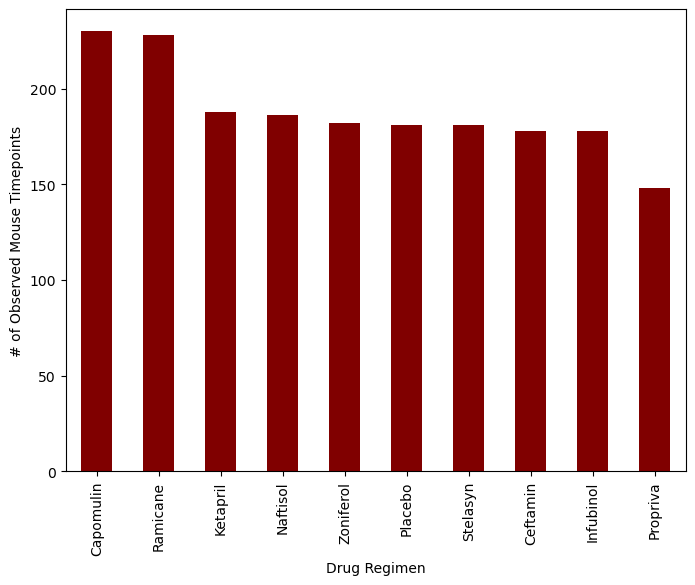

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoints_pl =df_per_drug["Timepoint"].count().sort_values(
                                                                    ascending = False
                                                                 ).plot(
                                                                        kind="bar",
                                                                        color="maroon",
                                                                        figsize=(8,6),
                                                                        xlabel="Drug Regimen",
                                                                        ylabel="# of Observed Mouse Timepoints"
                                                                        )


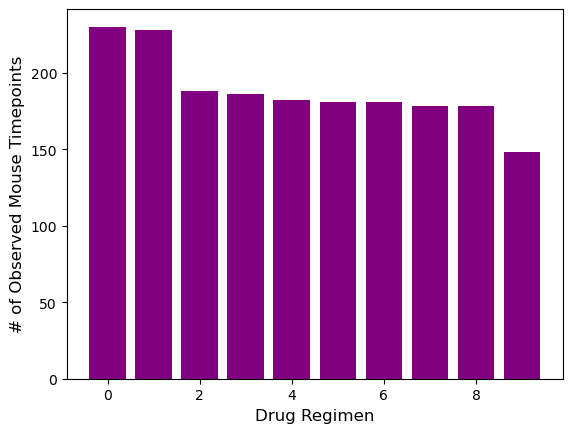

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df_plt = pd.DataFrame(df_per_drug["Timepoint"].count().sort_values(ascending = False)) 
df_plt.reset_index(inplace=True)
x_axis = np.arange(len(df_plt["Drug Regimen"]))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df_plt['Timepoint'], color = "purple")
plt.xticks = (tick_locations, list(df_plt["Drug Regimen"]))
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("# of Observed Mouse Timepoints",fontsize = 12)
plt.show()


In [12]:
# Prepare data for the distribution of female versus male
df_gender = df_cl.groupby(by=["Mouse ID", "Sex"])
df_gender = df_gender.count()
df_gender = pd.DataFrame(df_gender)
df_gender = df_gender.reset_index()
df_gender_total = pd.DataFrame(df_gender["Sex"].value_counts())
df_gender_total.columns = ["Total by Gender"]
df_gender_total["% Total by Gender"] = df_gender_total["Total by Gender"] / df_gender_total["Total by Gender"].sum() * 100

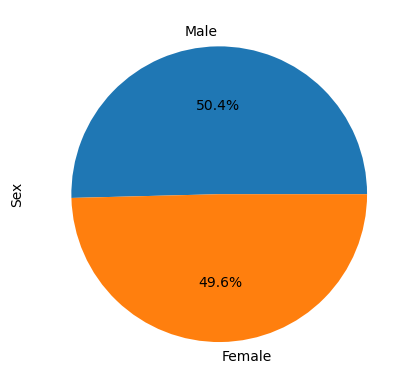

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt1 = df_gender_total.plot.pie(y="% Total by Gender",
                             legend = False,
                             ylabel = "Sex",
                             autopct="%1.1f%%")

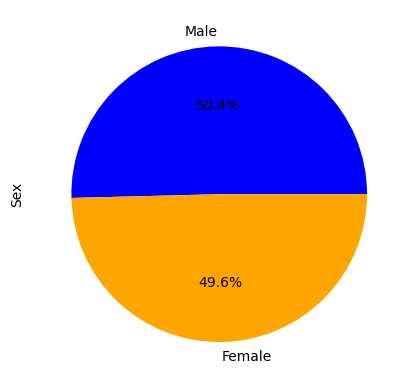

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue", "orange"]
sizes = df_gender_total["% Total by Gender"]
fig1, ax1 = plt.subplots()
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

<h2>Quartiles, Outliers and Boxplots</h2>

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse
max_timepoint = df_cl.groupby(by="Mouse ID")["Timepoint"].max()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_vol_df = pd.merge(max_timepoint, df_cl, on = ["Mouse ID", "Timepoint"])

# Teatments we are intersted in
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Pull data for those treatments - Capomulin, Ramicane, Infubinol, and Ceftamin
last_tumor_vol_reg = last_tumor_vol_df.loc[np.isin(last_tumor_vol_df["Drug Regimen"], treatments)]

last_tumor_vol_reg

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [87]:
# Summary Statistics for the treatments
# Quartiles and Outliers
print("""\n
________________________________________________________\n
Quartiles and Outliers for Treatments\n________________________________________________________
""")
for drug in treatments:
    print(f"*** {drug} ***\n")
    data = last_tumor_vol_reg.loc[last_tumor_vol_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of {drug} tumors is: {lowerq}")
    print(f"The upper quartile of {drug} tumors is: {upperq}")
    print(f"The interquartile range of {drug} tumors is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outliers = data.loc[(data < lower_bound) | (cupomulin_df > upper_bound)]
    if (len(outliers > 0)):
        print(f"{drug} potential outliers {outliers}")
    else: 
        print(f"No outliers detected for {drug}")
    print("\n")



________________________________________________________

Quartiles and Outliers for Treatments
________________________________________________________

*** Capomulin ***

The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No outliers detected for Capomulin


*** Ramicane ***

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No outliers detected for Ramicane


*** Infubinol ***

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
V